**This is a jupyter notebook to be shared publicly for the Campbell, J. & Poulsen, C. J. (2025) GRL manuscript.**

This notebook will include the following:
* What files must be read (netCDF files to be included in Zenodo repository)
* How ECS was calculated for all simulations
* How OHT was calculated for the OHT experiment
* An example of how a globally-averaged, mean annual CAM variable was calculated
* An example of how globally-averaged, mean annual snow coverage (from CLM) was calculated
* Code cells that were used to make the main text figures

Acronyms: ECS (equilibrium climate sensitivity), OHT (ocean heat transport), CAM (community atmosphere model), CLM (community land model), SOM (slab ocean model), GMST (global mean surface temperature), SWCF (shortwave cloud forcing)

Any questions can be directed to Julia Campbell (juliacam@umich.edu).

In [1]:
# Some libraries to import

import xarray as xr
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.util as cutil
import warnings
from matplotlib.figure import Axes
from matplotlib.figure import Figure
import xesmf as xe
from cmcrameri import cm
import matplotlib.cm as cmaps
from typing import List, Union, Tuple, Optional
from enum import Enum

The following code cells load in necessary files for the complete analysis.

In [2]:
# CAM climatology output for each SOM simulation
# This must be downloaded for the Zenodo repository and accessed on your own computer
# And you must change the file path to match your own file path, this will not work as is!

CRET3xSOM3x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/CRET3xSOM/atm/hist/CRET3xSOM.cam.h0.ANN.climo.nc")
CRET3xSOM6x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/CRET3xSOMx2/atm/hist/CRET3xSOMx2.cam.h0.ANN.climo.nc")
CRET3xSOM12x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/CRET3xSOMx4/atm/hist/CRET3xSOMx4.cam.h0.ANN.climo.nc")
CRET6xSOM6x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/CRET6xSOM/atm/hist/CRET6xSOM.cam.h0.ANN.climo.nc")
CRET6xSOM12x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/CRET6xSOMx2/atm/hist/CRET6xSOMx2.cam.h0.ANN.climo.nc")
CRET3xOHT6x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/CRET6xSOM_3xQ/atm/hist/CRET6xSOM_3xQ.cam.h0.ANN.climo.nc")
CRET3xOHT12x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/CRET6xSOMx2_3xQ/atm/hist/CRET6xSOMx2_3xQ.cam.h0.ANN.climo.nc")
EECO3xSOM3x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/PETM3xSOM/atm/hist/PETM3xSOM.cam.h0.ANN.climo.nc")
EECO3xSOM6x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/PETM3xSOMx2/atm/hist/PETM3xSOMx2.cam.h0.ANN.climo.nc")
OLIG2xSOM2x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/LOWP2xSOM/atm/hist/LOWP2xSOM.cam.h0.ANN.climo.nc")
OLIG2xSOM4x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/LOWP2xSOMx2/atm/hist/LOWP2xSOMx2.cam.h0.ANN.climo.nc")
PI1xSOM1x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/PI1xSOM/atm/hist/PI1xSOM.cam.h0.ANN.climo.nc")
PI1xSOM2x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/PI1xSOMx2/atm/hist/PI1xSOMx2.cam.h0.ANN.climo.nc")
PI1xSOM4x = xr.open_dataset(f"/glade/derecho/scratch/juliacam/archive/PI1xSOMx4/atm/hist/PI1xSOMx4.cam.h0.ANN.climo.nc")

In [16]:
# The q-flux forcing files for the OHT experiment
# This must be downloaded for the Zenodo repository and accessed on your own computer
# And you must change the file path to match your own file path, this will not work as is!

CRET3x = xr.open_dataset(f"/glade/work/juliacam/CRET/3x.pop_frc.gx1v6.240107.TEST.nc")
CRET6x = xr.open_dataset(f"/glade/work/juliacam/CRET/6x.pop_frc.gx1v6.240109.TEST.nc")

In [19]:
# The FSNO variable from CLM output for each SOM simulation
# This must be downloaded for the Zenodo repository and accessed on your own computer
# And you must change the file path to match your own file path, this will not work as is!

CRET3xSOM3xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/CRET3xSOM/climo/CRET3xSOM.clm2.h0.ANN.climo.FSNO.nc")
CRET3xSOM6xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/CRET3xSOMx2/climo/CRET3xSOMx2.clm2.h0.ANN.climo.FSNO.nc")
CRET3xSOM12xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/CRET3xSOMx4/climo/CRET3xSOMx4.clm2.h0.ANN.climo.FSNO.nc")
CRET6xSOM6xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/CRET6xSOM/climo/CRET6xSOM.clm2.h0.ANN.climo.FSNO.nc")
CRET6xSOM12xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/CRET6xSOMx2/climo/CRET6xSOMx2.clm2.h0.ANN.climo.FSNO.nc")
CRET3xOHT6xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/CRET6xSOM_3xQ/climo/CRET6xSOM_3xQ.clm2.h0.ANN.climo.FSNO.nc")
CRET3xOHT12xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/CRET6xSOMx2_3xQ/climo/CRET6xSOMx2_3xQ.clm2.h0.ANN.climo.FSNO.nc")
EECO3xSOM3xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/PETM3xSOM/climo/PETM3xSOM.clm2.h0.ANN.climo.FSNO.nc")
EECO3xSOM6xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/PETM3xSOMx2/climo/PETM3xSOMx2.clm2.h0.ANN.climo.FSNO.nc")
OLIG2xSOM2xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/LOWP2xSOM/climo/LOWP2xSOM.clm2.h0.ANN.climo.FSNO.nc")
OLIG2xSOM4xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/LOWP2xSOMx2/climo/LOWP2xSOMx2.clm2.h0.ANN.climo.FSNO.nc")
PI1xSOM1xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/PI1xSOM/climo/PI1xSOM.clm2.h0.ANN.climo.FSNO.nc")
PI1xSOM2xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/PI1xSOMx2/climo/PI1xSOMx2.clm2.h0.ANN.climo.FSNO.nc")
PI1xSOM4xsnow = xr.open_dataset(f"/glade/campaign/univ/umic0084/SOM/PI1xSOMx4/climo/PI1xSOMx4.clm2.h0.ANN.climo.FSNO.nc")

The following code cells contain the ECS calculations used in the manuscript.

In [8]:
# We need to weight the grid cells to get a proper GMST
# Grid cells near the equator take up more area on the globe than grid cells by the poles
# Every simulation is gridded the same so this weight factor works for all

coslat = np.cos(np.deg2rad(CRET3xSOM3x.lat)) # You can use any simulation here
weight_factor = coslat / coslat.mean(dim='lat') 

In [22]:
# Multiply the surface temperature variable by the above weight factor
# Use the average of all dimensions
# Subtract 273.15 to convert from Kelvin to Celsius
# The difference between the GMST of the doubled CO2 simulation and that of the original is the ECS

# CRET3xSOM3x
TS1 = ((CRET3xSOM3x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
TS2 = ((CRET3xSOM6x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
print(TS2 - TS1) 

# CRET3xSOM6x
TS1 = ((CRET3xSOM6x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
TS2 = ((CRET3xSOM12x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
print(TS2 - TS1) 

# CRET6xSOM6x
TS1 = ((CRET6xSOM6x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
TS2 = ((CRET6xSOM12x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
print(TS2 - TS1) 

# CRET3xOHT6x
TS1 = ((CRET3xOHT6x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
TS2 = ((CRET3xOHT12x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
print(TS2 - TS1) 

# EECO3xSOM3x
TS1 = ((EECO3xSOM3x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
TS2 = ((EECO3xSOM6x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
print(TS2 - TS1)

# OLIG2xSOM2x
TS1 = ((OLIG2xSOM2x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
TS2 = ((OLIG2xSOM4x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
print(TS2 - TS1)

# PI1xSOM1x
TS1 = ((PI1xSOM1x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
TS2 = ((PI1xSOM2x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
print(TS2 - TS1)

# PI1xSOM2x
TS1 = ((PI1xSOM2x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
TS2 = ((PI1xSOM4x.TS * weight_factor).mean(dim=('time', 'lon', 'lat'))) - 273.15
print(TS2 - TS1)

<xarray.DataArray ()>
array(5.56935017)
<xarray.DataArray ()>
array(6.13789861)
<xarray.DataArray ()>
array(6.65943028)
<xarray.DataArray ()>
array(5.77227275)
<xarray.DataArray ()>
array(6.57045504)
<xarray.DataArray ()>
array(5.06161489)
<xarray.DataArray ()>
array(4.03789144)
<xarray.DataArray ()>
array(4.62021867)


The following code cells contain the OHT calculations used in the manuscript.

In [24]:
# Need to set 'lat' and 'lon' as coordinates in q-flux forcing files

newCRET3x = CRET3x.set_coords(['lat','lon']) 
newCRET6x = CRET6x.set_coords(['lat','lon']) 

In [26]:
# Will need to regrid the q-flux forcing files that were read in to 1deg by 1deg

class GridType(Enum):
    U = "U"
    T = "T"

def regrid(
    dataset: xr.DataArray,
    output_dims: Tuple[int, int],
    interpolation_method: str = "bilinear",
    grid_type: GridType = GridType.T,
    periodic: bool = True,
    reuse_weights: bool = True,
) -> xr.DataArray:
    """
    This function takes in a dataarray that is in the curvilinear grid that POP
    uses and regrids it to a rectilinear grid using xesmf. The dimensions of
    the output grid are given as a tuple in degrees latitude and longitude
    (respectively). POP data should be regridded before plotting and before
    performing a zonal average.
    """
    lon_str, lat_str = f"lon", f"lat"
    output_grid = xe.util.grid_global(*output_dims)
    input_data = dataset.rename({lon_str: "lon", lat_str: "lat"})
    regridder = xe.Regridder(
        input_data,
        output_grid,
        interpolation_method,
        periodic=periodic
    )
    output_data = regridder(input_data)
    return output_data

C3x = regrid(newCRET3x, (1,1))
C6x = regrid(newCRET6x, (1,1))

In [33]:
# Steps to take to find average OHT for each hemisphere in each simulation
# OHT requires temperature, current velocity, specific heat capacity, and density

# Northern hemispheric OHT (PW) for the Cretaceous 3x PI CO2 ocean
meanC3x = C3x.mean(dim='time') # average out the time dimension (get mean annual)
selC3x = meanC3x.sel(y=slice(90,180)) # selects only the northern hemisphere
TC3x = selC3x.T.sum(dim=['x','y']) # northern hemispheric temperatures
VC3x = selC3x.V.sum(dim=['x','y']) # northern hemispheric meridional velocities
OHTN3x = (TC3x*VC3x*1025*4181) # temperature * velocity * density of seawater * specific heat capacity of seawater = OHT
print(OHTN3x/10e14) # convert to petawatts

# Southern hemispheric OHT (PW) for the Cretaceous 3x PI CO2 ocean
meanC3x = C3x.mean(dim='time') # average out the time dimension (get mean annual)
selC3x = meanC3x.sel(y=slice(0,90)) # selects only the southern hemisphere
TC3x = selC3x.T.sum(dim=['x','y']) # southern hemispheric temperatures
VC3x = selC3x.V.sum(dim=['x','y']) # southern hemispheric meridional velocities
OHTS3x = (TC3x*VC3x*1025*4181) # temperature * velocity * density of seawater * specific heat capacity of seawater = OHT
print(OHTS3x/10e14) # convert to petawatts

# Northern hemispheric OHT (PW) for the Cretaceous 6x PI CO2 ocean
meanC6x = C6x.mean(dim='time') # average out the time dimension (get mean annual)
selC6x = meanC6x.sel(y=slice(90,180)) # selects only the northern hemisphere
TC6x = selC6x.T.sum(dim=['x','y']) # northern hemispheric temperatures
VC6x = selC6x.V.sum(dim=['x','y']) # northern hemispheric meridional velocities
OHTN6x = (TC6x*VC6x*1025*4181) # temperature * velocity * density of seawater * specific heat capacity of seawater = OHT
print(OHTN6x/10e14) # convert to petawatts

# Southern hemispheric OHT (PW) for the Cretaceous 6x PI CO2 ocean
meanC6x = C6x.mean(dim='time') # average out the time dimension (get mean annual)
selC6x = meanC6x.sel(y=slice(0,90)) # selects only the southern hemisphere
TC6x = selC6x.T.sum(dim=['x','y']) # southern hemispheric temperatures
VC6x = selC6x.V.sum(dim=['x','y']) # southern hemispheric meridional velocities
OHTS6x = (TC6x*VC6x*1025*4181) # temperature * velocity * density of seawater * specific heat capacity of seawater = OHT
print(OHTS6x/10e14) # convert to petawatts

<xarray.DataArray ()>
array(0.56506906)
<xarray.DataArray ()>
array(-0.43436213)
<xarray.DataArray ()>
array(0.68388305)
<xarray.DataArray ()>
array(-0.53153295)


In [44]:
# Now find the percent difference in hemispheric OHT averages between simulations

print(((0.684 - 0.565) / 0.565) * 100) # northern hemisphere difference (21.1% stronger in C6x)
print(((-0.532 - -0.434) / -0.434) * 100) # southern hemisphere difference (22.6% stronger in C6x)

21.06194690265489
22.58064516129033


The following code cell contains an example of how a globally-averaged, mean annual CAM variable was calculated for the manuscript.

In [55]:
# We need to properly weight the grid cells again to get a global average
# Here, I am finding the difference in SWCF between CRET3xSOM3x (original) and CRET3xSOM6x (doubled CO2) simulations
# Switch out the simulation names to find the same variable for different simulations
# Switch out the variable name to find a different variable for the same simulations

coslat = np.cos(np.deg2rad(CRET3xSOM3x.lat)) 
weight_factor = coslat / coslat.mean(dim='lat')
V1 = (CRET3xSOM3x.SWCF * weight_factor).mean(dim=('time', 'lon', 'lat')) 
V2 = (CRET3xSOM6x.SWCF * weight_factor).mean(dim=('time', 'lon', 'lat')) 
print(V2 - V1) # Watts per meter squared 
print(((V2 - V1) / V1) * 100) # Percent difference
print((((V2 - V1) / V1) * 100) / 5.57) # Percent difference per degree Kelvin of ECS

<xarray.DataArray ()>
array(4.16948251)
<xarray.DataArray ()>
array(-9.65278959)
<xarray.DataArray ()>
array(-1.73299634)


The following code cell contains an example of how globally-averaged, mean annual snow coverage from CLM was calculated for the manuscript.

In [58]:
# We need to properly weight the grid cells again to get a global average
# Here, I am finding the difference in snow-covered land fraction (FSNO) between CRET3xSOM3x (original) and CRET3xSOM6x (doubled CO2) simulations

coslat = np.cos(np.deg2rad(CRET3xSOM3xsnow.lat)) 
weight_factor = coslat / coslat.mean(dim='lat')
V1 = (CRET3xSOM3xsnow.FSNO * weight_factor).mean(dim=('time', 'lon', 'lat')) 
V2 = (CRET3xSOM6xsnow.FSNO * weight_factor).mean(dim=('time', 'lon', 'lat')) 
print((V2 - V1) * 100) # Percent

<xarray.DataArray ()>
array(-5.35162746)


The following code cells were used to make the main text figures in the manuscript.
The numbers were found through global mean calculations, like the ones above.

/glade/derecho/scratch/juliacam/tmp/ipykernel_30621/1818304294.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors=cmaps.get_cmap('RdYlBu')


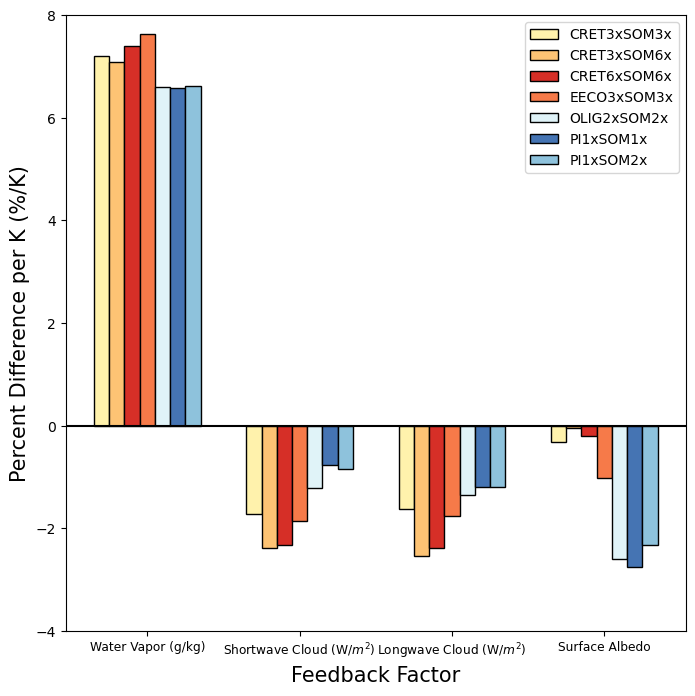

In [60]:
# Making Figure 1

colors=cmaps.get_cmap('RdYlBu')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

plt.bar(1-0.6, 7.20, label="CRET3xSOM3x", color=colors(0.46), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(1-0.4, 7.08, label="CRET3xSOM6x", color=colors(0.34), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(1-0.2, 7.39, label="CRET6xSOM6x", color=colors(0.1), edgecolor='black',  linewidth=1, align='center', width=0.2)
plt.bar(1, 7.63, label="EECO3xSOM3x", color=colors(0.22), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(1+0.2, 6.60, label="OLIG2xSOM2x", color=colors(0.6), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(1+0.4, 6.58, label="PI1xSOM1x", color=colors(0.9), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(1+0.6, 6.62, label="PI1xSOM2x", color=colors(0.75), edgecolor='black', linewidth=1, align='center', width=0.2)

plt.bar(3-0.6, -1.72, color=colors(0.46), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(3-0.4, -2.39, color=colors(0.34), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(3-0.2, -2.33, color=colors(0.1), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(3, -1.86, color=colors(0.22), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(3+0.2, -1.21, color=colors(0.6), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(3+0.4, -0.77, color=colors(0.9), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(3+0.6, -0.84, color=colors(0.75), edgecolor='black', linewidth=1, align='center', width=0.2)

plt.bar(5-0.6, -1.62, color=colors(0.46), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(5-0.4, -2.54, color=colors(0.34), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(5-0.2, -2.39, color=colors(0.1), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(5, -1.75, color=colors(0.22), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(5+0.2, -1.34, color=colors(0.6), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(5+0.4, -1.19, color=colors(0.9), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(5+0.6, -1.19, color=colors(0.75), edgecolor='black', linewidth=1, align='center', width=0.2)

plt.bar(7-0.6, -0.32, color=colors(0.46), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(7-0.4, -0.05, color=colors(0.34), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(7-0.2, -0.20, color=colors(0.1), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(7, -1.02, color=colors(0.22), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(7+0.2, -2.59, color=colors(0.6), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(7+0.4, -2.75, color=colors(0.9), edgecolor='black', linewidth=1, align='center', width=0.2)
plt.bar(7+0.6, -2.32, color=colors(0.75), edgecolor='black', linewidth=1, align='center', width=0.2)

plt.axhline(y=0, color='black', linestyle='-')
plt.xticks((1, 3, 5, 7), ('Water Vapor (g/kg)', 'Shortwave Cloud (W/$m^2$)', 'Longwave Cloud (W/$m^2$)', 'Surface Albedo'), size=8.8)
plt.ylim(-4,8)

ax.set_ylabel("Percent Difference per K (%/K)", size=15)
ax.set_xlabel("Feedback Factor", size=15)
ax.legend(loc='upper right')
plt.show()
fig.savefig("All_bar__perKdifferences.png", dpi=600, bbox_inches='tight', transparent=True)

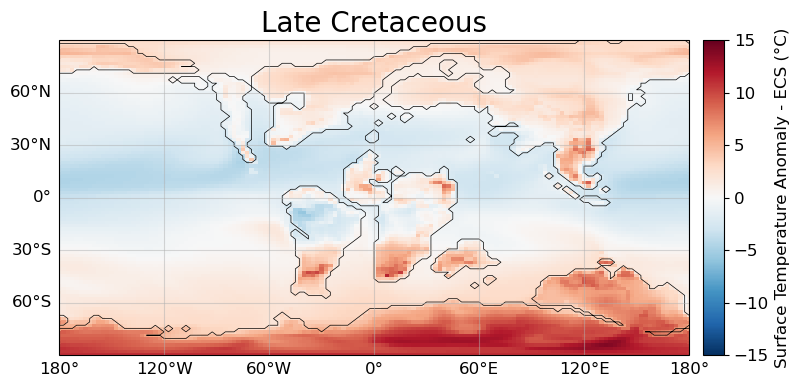

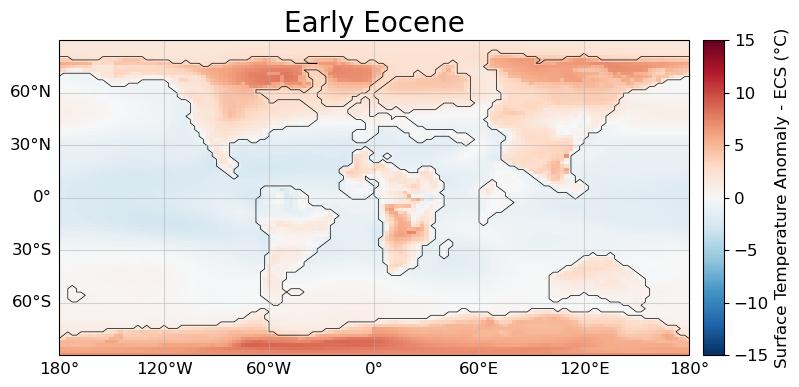

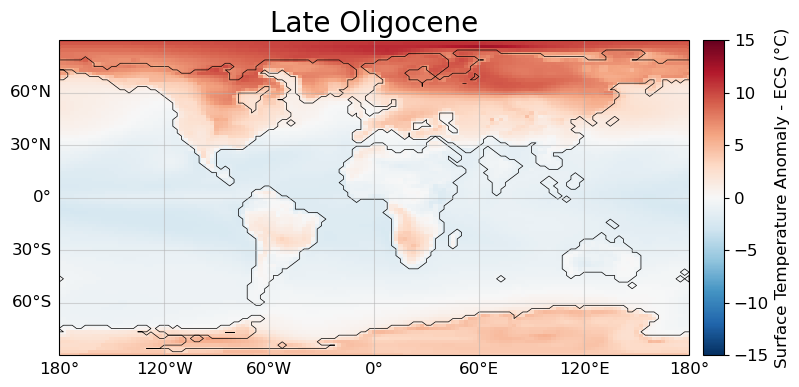

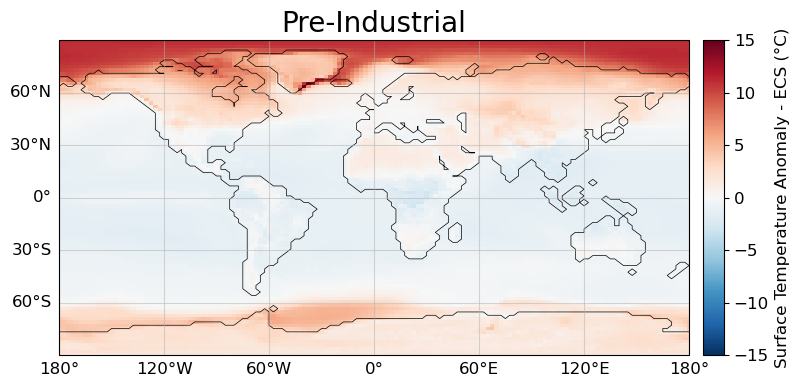

In [6]:
# Making figure 2

# Definition for 'plot_land' for geographic outline in figures
def plot_land(ax: Axes, land_frac: xr.DataArray, threshold=0.5):
    """
    Plot the outline of grid cells that contain a land fraction greater than the
    provided threshold. Useful for plotting the paleo outline of continents.
    land_frac: A DataArray from CESM that contains the fraction of land at each
    given grid cell
    threshold: The fraction of land that needs to be in a grid cell to be considered
    in the outline
    """
    land = land_frac >= threshold
    ocean = land_frac < threshold
    cyclic_land, cyclic_land_lon = cutil.add_cyclic_point(land, coord=land.lon)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax.contour(
            cyclic_land_lon,
            land.lat,
            cyclic_land,
            transform=ccrs.PlateCarree(),
            colors="black",
            levels=[1],
            linewidths=0.5,
        )

# Cretaceous example
land = CRET6xSOM6x.LANDFRAC.isel(time=0)

Tot = (CRET6xSOM12x.TS.mean(dim='time')) - (CRET6xSOM6x.TS.mean(dim='time'))
Tot1 = Tot - 6.66

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land)
gl = ax.gridlines(draw_labels=True, alpha=0.5)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}  
gl.ylabel_style = {'size': 12}
data = ax.pcolormesh(Tot1.lon, Tot1.lat, Tot1, cmap='RdBu_r', vmin=-15, vmax=15)
cbar = plt.colorbar(data, ax=ax, orientation='vertical', pad=0.01, aspect=15)
cbar.set_label("Surface Temperature Anomaly - ECS (°C)", fontsize=12)  
cbar.ax.tick_params(labelsize=12)  
ax.set_title("Late Cretaceous", size=20)
plt.show()
fig.savefig("CRET6x_patterneffect.png", dpi=600, bbox_inches='tight', transparent=True)

# Eocene example
land = EECO3xSOM3x.LANDFRAC.isel(time=0)

Tot = (EECO3xSOM6x.TS.mean(dim='time')) - (EECO3xSOM3x.TS.mean(dim='time'))
Tot1 = Tot - 6.57

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land)
gl = ax.gridlines(draw_labels=True, alpha=0.5)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}  
gl.ylabel_style = {'size': 12}
data = ax.pcolormesh(Tot1.lon, Tot1.lat, Tot1, cmap='RdBu_r', vmin=-15, vmax=15)
cbar = plt.colorbar(data, ax=ax, orientation='vertical', pad=0.01, aspect=15)
cbar.set_label("Surface Temperature Anomaly - ECS (°C)", fontsize=12)  
cbar.ax.tick_params(labelsize=12)  
ax.set_title("Early Eocene", size=20)
plt.show()
fig.savefig("EECO3x_patterneffect.png", dpi=600, bbox_inches='tight', transparent=True)

# Oligocene example
land = OLIG2xSOM2x.LANDFRAC.isel(time=0)

Tot = (OLIG2xSOM4x.TS.mean(dim='time')) - (OLIG2xSOM2x.TS.mean(dim='time'))
Tot1 = Tot - 5.06

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land)
gl = ax.gridlines(draw_labels=True, alpha=0.5)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}  
gl.ylabel_style = {'size': 12}
data = ax.pcolormesh(Tot1.lon, Tot1.lat, Tot1, cmap='RdBu_r', vmin=-15, vmax=15)
cbar = plt.colorbar(data, ax=ax, orientation='vertical', pad=0.01, aspect=15)
cbar.set_label("Surface Temperature Anomaly - ECS (°C)", fontsize=12)  
cbar.ax.tick_params(labelsize=12)  
ax.set_title("Late Oligocene", size=20)
plt.show()
fig.savefig("OLIG2x_patterneffect.png", dpi=600, bbox_inches='tight', transparent=True)

# Pre-Industrial example
land = PI1xSOM1x.LANDFRAC.isel(time=0)

Tot = (PI1xSOM2x.TS.mean(dim='time')) - (PI1xSOM1x.TS.mean(dim='time'))
Tot1 = Tot - 4.04

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land)
gl = ax.gridlines(draw_labels=True, alpha=0.5)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 12}  # Larger gridline label font
gl.ylabel_style = {'size': 12}
data = ax.pcolormesh(Tot1.lon, Tot1.lat, Tot1, cmap='RdBu_r', vmin=-15, vmax=15)
cbar = plt.colorbar(data, ax=ax, orientation='vertical', pad=0.01, aspect=15)
cbar.set_label("Surface Temperature Anomaly - ECS (°C)", fontsize=12)  # Larger label font
cbar.ax.tick_params(labelsize=12)  # Larger tick font on colorbar
ax.set_title("Pre-Industrial", size=20)
plt.show()
fig.savefig("PI1x_patterneffect.png", dpi=600, bbox_inches='tight', transparent=True)

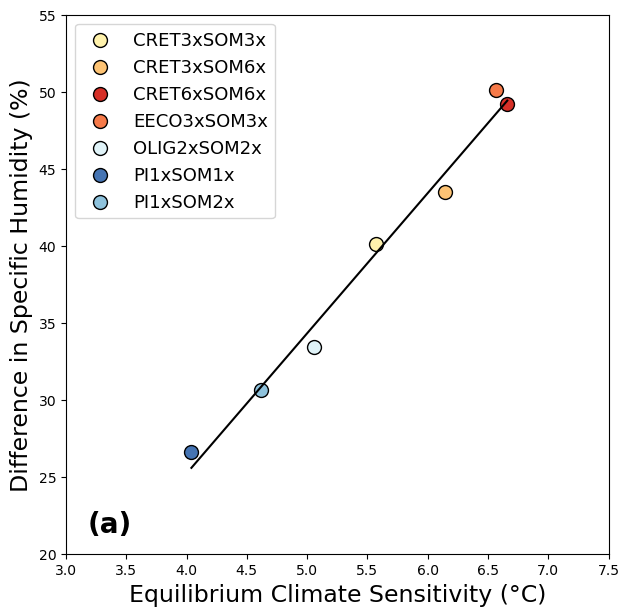

{'polynomial': [9.100998414534857, -11.192085529416797], 'correlation': 0.9927294976859872, 'determination': 0.9855118555758724}


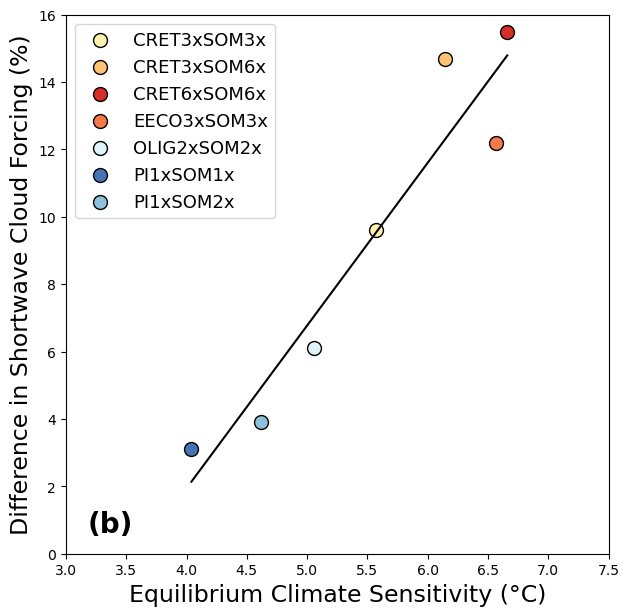

{'polynomial': [4.82990768117391, -17.374890136311908], 'correlation': 0.9536144741757919, 'determination': 0.9093805653575722}


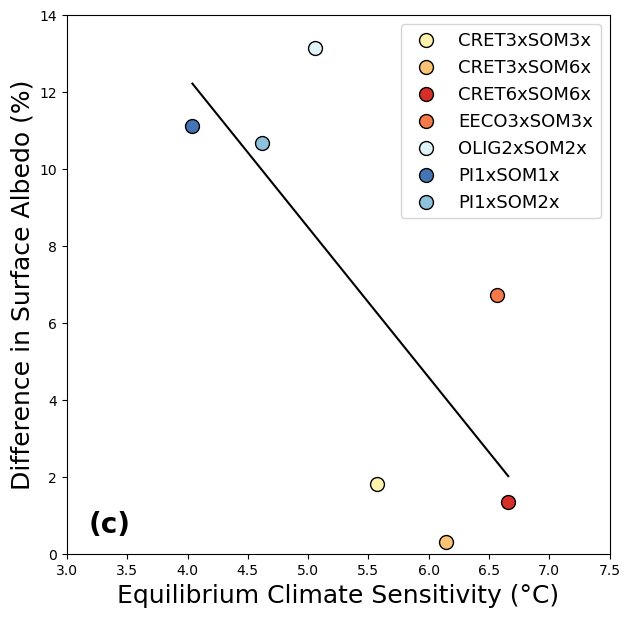

{'polynomial': [-3.891788433246203, 27.933791547042595], 'correlation': -0.7319255933877373, 'determination': 0.5357150742559914}


In [9]:
# Making Figure 3

# Use this definition to get r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    correlation = np.corrcoef(x, y)[0,1]
     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2
    return results

# Specific humidity
colors=cmaps.get_cmap('RdYlBu')

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

plt.scatter(5.57, 40.1, label="CRET3xSOM3x", color=colors(0.46), edgecolors='black', s=100, linewidth=1)
plt.scatter(6.14, 43.5, label="CRET3xSOM6x", color=colors(0.34), edgecolors='black', s=100, linewidth=1)
plt.scatter(6.66, 49.2, label="CRET6xSOM6x", color=colors(0.1), edgecolors='black', s=100, linewidth=1)
plt.scatter(6.57, 50.1, label="EECO3xSOM3x", color=colors(0.22), edgecolors='black', s=100, linewidth=1)
plt.scatter(5.06, 33.4, label="OLIG2xSOM2x", color=colors(0.6), edgecolors='black', s=100, linewidth=1)
plt.scatter(4.04, 26.6, label="PI1xSOM1x", color=colors(0.9), edgecolors='black', s=100, linewidth=1)
plt.scatter(4.62, 30.6, label="PI1xSOM2x", color=colors(0.75), edgecolors='black', s=100, linewidth=1)

xs = [5.57, 6.14, 6.66, 6.57, 5.06, 4.04, 4.62]
ys = [40.1, 43.5, 49.2, 50.1, 33.4, 26.6, 30.6]
plt.plot(np.unique(xs), np.poly1d(np.polyfit(xs, ys, 1))(np.unique(xs)), color='black')

plt.ylim(20,55)
plt.xlim(3,7.5)

ax.set_ylabel("Difference in Specific Humidity (%)", size=17)
ax.set_xlabel("Equilibrium Climate Sensitivity (°C)", size=17)
ax.text(0.04, 0.04, "(a)", transform=ax.transAxes, fontsize=20, fontweight='bold')
ax.legend(loc='upper left',fontsize=13)
plt.show()
fig.savefig("ECS_SH_Percent.png", dpi=600, bbox_inches='tight', transparent=True)
print(polyfit(xs, ys, 1))

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

plt.scatter(5.57, 9.6, label="CRET3xSOM3x", color=colors(0.46), edgecolors='black', s=100, linewidth=1)
plt.scatter(6.14, 14.7, label="CRET3xSOM6x", color=colors(0.34), edgecolors='black', s=100, linewidth=1)
plt.scatter(6.66, 15.5, label="CRET6xSOM6x", color=colors(0.1), edgecolors='black', s=100, linewidth=1)
plt.scatter(6.57, 12.2, label="EECO3xSOM3x", color=colors(0.22), edgecolors='black', s=100, linewidth=1)
plt.scatter(5.06, 6.1, label="OLIG2xSOM2x", color=colors(0.6), edgecolors='black',  s=100, linewidth=1)
plt.scatter(4.04, 3.1, label="PI1xSOM1x", color=colors(0.9), edgecolors='black',  s=100, linewidth=1)
plt.scatter(4.62, 3.9, label="PI1xSOM2x", color=colors(0.75), edgecolors='black',  s=100, linewidth=1)

xs = [5.57, 6.14, 6.66, 6.57, 5.06, 4.04, 4.62]
ys = [9.60, 14.70, 15.50, 12.20, 6.10, 3.10, 3.90]
plt.plot(np.unique(xs), np.poly1d(np.polyfit(xs, ys, 1))(np.unique(xs)), color='black')

plt.ylim(0,16)
plt.xlim(3,7.5)

ax.set_ylabel("Difference in Shortwave Cloud Forcing (%)", size=17)
ax.set_xlabel("Equilibrium Climate Sensitivity (°C)", size=17)
ax.text(0.04, 0.04, "(b)", transform=ax.transAxes, fontsize=20, fontweight='bold')
ax.legend(loc='upper left',fontsize=13)
plt.show()
fig.savefig("ECS_SWCF_Percent.png", dpi=600, bbox_inches='tight', transparent=True)
print(polyfit(xs, ys, 1))

# Surface albedo
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

plt.scatter(5.57, 1.80, label="CRET3xSOM3x", color=colors(0.46), edgecolors='black', s=100, linewidth=1)
plt.scatter(6.14, 0.31, label="CRET3xSOM6x", color=colors(0.34), edgecolors='black', s=100, linewidth=1)
plt.scatter(6.66, 1.34, label="CRET6xSOM6x", color=colors(0.1), edgecolors='black', s=100, linewidth=1)
plt.scatter(6.57, 6.72, label="EECO3xSOM3x", color=colors(0.22), edgecolors='black', s=100, linewidth=1)
plt.scatter(5.06, 13.13, label="OLIG2xSOM2x", color=colors(0.6), edgecolors='black', s=100, linewidth=1)
plt.scatter(4.04, 11.12, label="PI1xSOM1x", color=colors(0.9), edgecolors='black', s=100, linewidth=1)
plt.scatter(4.62, 10.66, label="PI1xSOM2x", color=colors(0.75), edgecolors='black', s=100, linewidth=1)

xs = [5.57, 6.14, 6.66, 6.57, 5.06, 4.04, 4.62]
ys = [1.80, 0.31, 1.34, 6.72, 13.13, 11.12, 10.66]
plt.plot(np.unique(xs), np.poly1d(np.polyfit(xs, ys, 1))(np.unique(xs)), color='black')

plt.ylim(0,14)
plt.xlim(3,7.5)

ax.set_ylabel("Difference in Surface Albedo (%)", size=18)
ax.set_xlabel("Equilibrium Climate Sensitivity (°C)", size=18)
ax.text(0.04, 0.04, "(c)", transform=ax.transAxes, fontsize=20, fontweight='bold')
ax.legend(loc='upper right',fontsize=13)
plt.show()
fig.savefig("ECS_Surface_Albedo_Percent.png", dpi=600, bbox_inches='tight', transparent=True)
print(polyfit(xs, ys, 1))